<a href="https://colab.research.google.com/github/PascalAdriantha/Sentiment-Analysis/blob/main/Sentiment_Analysis_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import

In [ ]:
import pandas as pd
import numpy as np
import re

## 2. Read & check dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datasetAwal = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Textblob Data/Data_TextBlobed_10000.csv")##[["tweets","labels"]]

In [ ]:
##dataset = dataset.rename({'Clean Tweets': 'tweets', 'roberta_result': 'labels'}, axis=1)

In [ ]:
dataset = datasetAwal.head(3000)

In [ ]:
dataset.head

<bound method NDFrame.head of                                                  tweets    labels
0     ChatGPT: Optimizing Language Models for Dialog...   neutral
1     Try talking with ChatGPT, our new AI system wh...  positive
2     ChatGPT: Optimizing Language Models for Dialog...   neutral
3     THRILLED to share that ChatGPT, our new model ...  positive
4     As of 2 minutes ago, @OpenAI released their ne...  positive
...                                                 ...       ...
2995                    ChatGPT https://t.co/heMojw0JUe   neutral
2996  Not sure if large language models are sentient...  positive
2997          I'm dead #ChatGPT https://t.co/KzQ2EjTlWb  negative
2998  ChatGPT is a typical whataboutist. Next! https...  negative
2999  Half of the people in my life have spent the l...  negative

[3000 rows x 2 columns]>

In [ ]:
dataset.labels.value_counts()

positive    1624
neutral     1001
negative     375
Name: labels, dtype: int64

In [ ]:
for i in dataset.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

## 3. Preprocessing 

In [ ]:
#create cleansing function

def cleanTweets(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #menghapus mentions
  text = re.sub(r'#','', text) #menghapus hashtag
  text = re.sub(r'RT[\s]+','', text) #menghapus RT
  text = re.sub(r'https?:\/\/\S+','', text) #menghapus links
  text = re.sub('[^a-zA-Z]', ' ', text).lower() #mengubah huruf kecil, menghapus tanda baca dan simbol
  return text

dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)

dataset[["tweets", "Cleaned Tweets"]]

<ipython-input-11-cfca84ea98e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)


,tweets,Cleaned Tweets
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...",try talking with chatgpt our new ai system wh...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled to share that chatgpt our new model ...
4,"As of 2 minutes ago, @OpenAI released their ne...",as of minutes ago released their new chatg...
...,...,...
2995,ChatGPT https://t.co/heMojw0JUe,chatgpt
2996,Not sure if large language models are sentient...,not sure if large language models are sentient...
2997,I'm dead #ChatGPT https://t.co/KzQ2EjTlWb,i m dead chatgpt
2998,ChatGPT is a typical whataboutist. Next! https...,chatgpt is a typical whataboutist next


In [ ]:
#save cleansing result as csv
dataset.to_csv('Raw Data Train_Tokenized.csv', encoding='utf8', index=False)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#positiveTweets = dataset[dataset.labels == 'positive']
#positiveTweets.head()

## Tokenization

In [ ]:
def tokenizeTweet(text):
  tokenizedTweet = text.split()
  return tokenizedTweet
dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))

<ipython-input-15-268bb53e51f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))


In [ ]:
dataset[["Cleaned Tweets", "Tokenized"]].head(25)

,Cleaned Tweets,Tokenized
0,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d..."
1,try talking with chatgpt our new ai system wh...,"[try, talking, with, chatgpt, our, new, ai, sy..."
2,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d..."
3,thrilled to share that chatgpt our new model ...,"[thrilled, to, share, that, chatgpt, our, new,..."
4,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c..."
5,just launched chatgpt our new ai system which...,"[just, launched, chatgpt, our, new, ai, system..."
6,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c..."
7,chatgpt coming out strong refusing to help me ...,"[chatgpt, coming, out, strong, refusing, to, h..."
8,penal just deployed a thing i ve been helping...,"[penal, just, deployed, a, thing, i, ve, been,..."
9,research preview of our newest model chatgpt ...,"[research, preview, of, our, newest, model, ch..."


## Lemmatization and Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
def stopword_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])


dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))

from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-18-4f50e36f3e5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))
<ipython-input-18-4f50e36f3e5d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)


In [ ]:
dataset[["Tokenized", "Lemmatized and Stopword"]].head(25)

,Tokenized,Lemmatized and Stopword
0,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue
1,"[try, talking, with, chatgpt, our, new, ai, sy...",try talk chatgpt new ai system optimize dialog...
2,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue ai ma...
3,"[thrilled, to, share, that, chatgpt, our, new,...",thrill share chatgpt new model optimize dialog...
4,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use right
5,"[just, launched, chatgpt, our, new, ai, system...",launch chatgpt new ai system optimize dialogue
6,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use righ...
7,"[chatgpt, coming, out, strong, refusing, to, h...",chatgpt come strong refuse help stalk someone ...
8,"[penal, just, deployed, a, thing, i, ve, been,...",penal deploy thing help build last couple mont...
9,"[research, preview, of, our, newest, model, ch...",research preview newest model chatgpt n nwe tr...


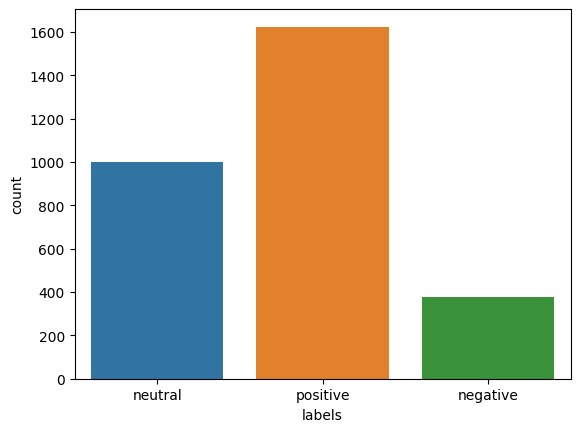

In [ ]:
import seaborn as sns
sns.countplot(x='labels', data=dataset);

## Word Clouds

In [ ]:
datasetNegative = dataset[ (dataset['labels']=='negative')]
datasetPositive = dataset[ (dataset['labels']=='positive')]

negativeList = datasetNegative['Lemmatized and Stopword'].tolist()
positiveList = datasetPositive['Lemmatized and Stopword'].tolist()

filtered_negative = ("").join(str(datasetNegative)) #convert the list into a string of spam
#filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(datasetPositive)) #convert the list into a string of spam
#filtered_positive = filtered_positive.lower()

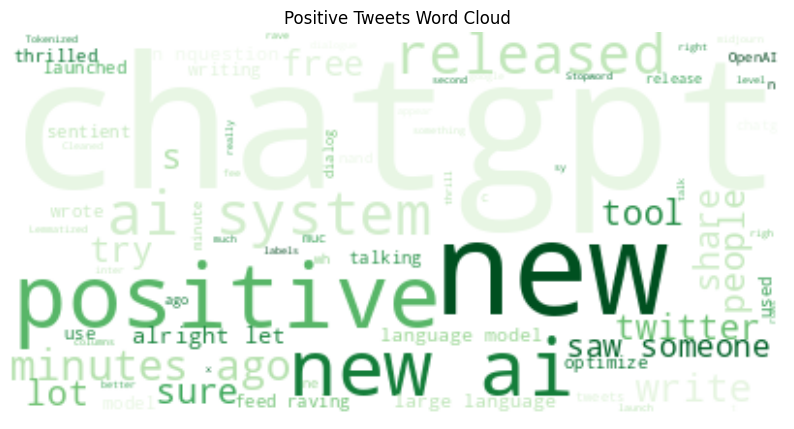

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Tweets Word Cloud")
plt.show()

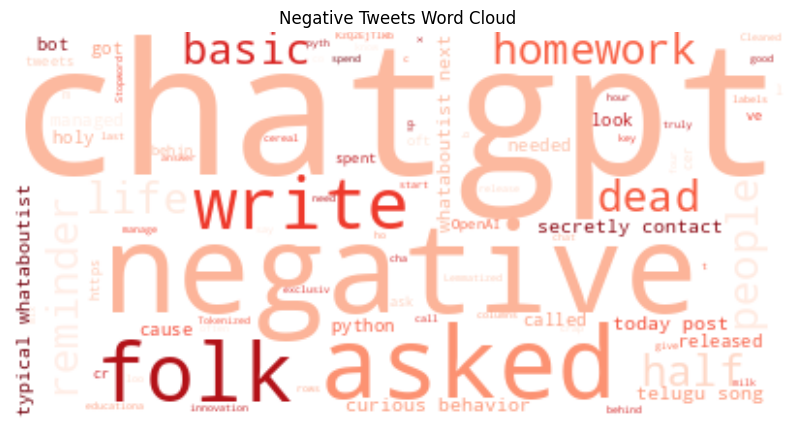

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Tweets Word Cloud")
plt.show()

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

## Split Data

In [ ]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['Lemmatized and Stopword'], 
                                                                    dataset['labels'], test_size = 0.2, random_state = 0)
print(train_X.shape,train_Y.shape)
print(test_X.shape,test_Y.shape)

(2400,) (2400,)
(600,) (600,)


In [ ]:
df_train80 = pd.DataFrame()
df_train80['Final Tweets'] = train_X
df_train80['labels'] = train_Y

df_test20 = pd.DataFrame()
df_test20['Final Tweets'] = test_X
df_test20['labels'] = test_Y

In [ ]:
df_train80

,Final Tweets,labels
2370,chatgpt capitalism several reason capitalism c...,positive
1774,new chatgpt cool see struggle update chess boa...,positive
731,would operate system optimise personal knowled...,neutral
271,ok chatgpt good pas turing test dumb bite do,positive
1077,openai chatgpt optimize language model dialogue,neutral
...,...,...
763,hour chatgpt,neutral
835,miss link database language model n nchatgpt,negative
1653,enjoy introduce chatgpt non technical friend f...,positive
2607,chatgpt openai via towardsai machinelearning m...,neutral


In [ ]:
df_test20

,Final Tweets,labels
311,weird chatgpt get confuse sort question easily,negative
1025,try calculate poodle iteration base size x pop...,positive
1587,simplify case fact chatgpt understand elixir f...,positive
2941,chatgpt powerful already matter time people sa...,positive
2980,overhear neurips n n gt meta party overcapacit...,positive
...,...,...
913,use chatgpt solve advent code puzzle n nmind b...,neutral
1431,chatgpt dream tool n nsolve problem come idea ...,positive
654,yet another large language model chatgpt,positive
476,q homer simpson fake n nchatgpt evidence sugge...,negative


In [ ]:
df_train80.to_csv('df_train80.csv', encoding='utf8', index=False)
df_test20.to_csv('df_test20.csv', encoding='utf8', index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tf-idf
tfidf_vect_8020 = TfidfVectorizer(max_features = 5000)
tfidf_vect_8020.fit(dataset['Lemmatized and Stopword'])

train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['Final Tweets'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['Final Tweets'])

In [ ]:
dataset[["Lemmatized and Stopword"]].head(2)

,Lemmatized and Stopword
0,chatgpt optimize language model dialogue
1,try talk chatgpt new ai system optimize dialog...


In [ ]:
print(train_X_tfidf_8020)

  (0, 4262)	0.19164931020851136
  (0, 4076)	0.38329862041702273
  (0, 3915)	0.3513408838383899
  (0, 3525)	0.2874254106811243
  (0, 3163)	0.1069008961979774
  (0, 933)	0.3047007526154515
  (0, 860)	0.38329862041702273
  (0, 702)	0.024421403052967316
  (0, 623)	0.5469068143658967
  (0, 430)	0.22139787658451407
  (0, 167)	0.10193260112666618
  (1, 4695)	0.29462103957480107
  (1, 4243)	0.30175335366069483
  (1, 3872)	0.19407380544250413
  (1, 3403)	0.19840848822481325
  (1, 3240)	0.20506133214537542
  (1, 2700)	0.16125667337984076
  (1, 2412)	0.2563718976401868
  (1, 1898)	0.2716516708961709
  (1, 1869)	0.282993108781211
  (1, 1523)	0.26092656790650764
  (1, 993)	0.2427012244400316
  (1, 715)	0.34225994120338993
  (1, 702)	0.04901568439702658
  (1, 482)	0.3846552994401706
  :	:
  (2398, 3392)	0.213911823647016
  (2398, 3020)	0.11353625981398574
  (2398, 2703)	0.2339157553234837
  (2398, 2449)	0.331221724537519
  (2398, 2447)	0.2536943828800171
  (2398, 2314)	0.23059373426957827
  (2398, 1

In [ ]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

(2400, 5000)
(600, 5000)


## Balancing Train Dataset

In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy="not majority")
X_train_ros, y_train_ros = ROS.fit_resample(train_X_tfidf_8020, train_Y)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from collections import Counter
Counter(y_train_ros)


Counter({'positive': 1293, 'neutral': 1293, 'negative': 1293})

In [ ]:
print(tfidf_vect_8020.vocabulary_)

{'chatgpt': 702, 'optimize': 3040, 'language': 2226, 'model': 2457, 'dialogue': 1263, 'try': 4580, 'talk': 4367, 'new': 2700, 'ai': 106, 'system': 4349, 'feedback': 1716, 'help': 2023, 'improve': 2105, 'machinelearning': 2314, 'datascience': 1131, 'artificialintelligence': 271, 'ntrending': 2895, 'ml': 2447, 'article': 268, 'identify': 2081, 'amp': 177, 'digest': 1277, 'via': 4775, 'granola': 1971, 'machine': 2313, 'drive': 1390, 'bot': 505, 'ramsey': 3486, 'elbasheer': 1468, 'thrill': 4461, 'share': 3939, 'dialog': 1262, 'public': 3437, 'free': 1837, 'accessible': 23, 'everyone': 1593, 'minute': 2433, 'ago': 100, 'release': 3592, 'nand': 2549, 'use': 4714, 'right': 3700, 'launch': 2236, 'come': 843, 'strong': 4238, 'refuse': 3566, 'stalk': 4183, 'someone': 4094, 'agree': 101, 'provide': 3424, 'waldo': 4816, 'penal': 3157, 'deploy': 1222, 'thing': 4443, 'build': 572, 'last': 2231, 'couple': 1022, 'month': 2482, 'chatbot': 698, 'base': 379, 'gpt': 1966, 'really': 3523, 'excite': 1613, '

## Training Model

In [ ]:
# Training Process 400
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_ros,y_train_ros)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Testing 100
predictions_SVM_8020 = model.predict(test_X_tfidf_8020) #dikalakukan testing dengan df test_X_tfidf_8020
test_prediction_8020 = pd.DataFrame()
test_prediction_8020['Tweets'] = test_X
test_prediction_8020['Label'] = predictions_SVM_8020
SVM_accuracy_8020 = accuracy_score(predictions_SVM_8020, test_Y)*100
SVM_accuracy_8020 = round(SVM_accuracy_8020,1)




In [ ]:
test_prediction_8020.head

<bound method NDFrame.head of                                                  Tweets     Label
311      weird chatgpt get confuse sort question easily  negative
1025  try calculate poodle iteration base size x pop...  negative
1587  simplify case fact chatgpt understand elixir f...   neutral
2941  chatgpt powerful already matter time people sa...  positive
2980  overhear neurips n n gt meta party overcapacit...  positive
...                                                 ...       ...
913   use chatgpt solve advent code puzzle n nmind b...   neutral
1431  chatgpt dream tool n nsolve problem come idea ...  negative
654            yet another large language model chatgpt  positive
476   q homer simpson fake n nchatgpt evidence sugge...  positive
2326  tweet fran ois chollet like think chatgpt seem...  positive

[600 rows x 2 columns]>

In [ ]:
test_prediction_8020.to_csv('test_prediction_8020.csv', encoding='utf8', index=False)

In [ ]:
SVM_accuracy_8020

73.2

              precision    recall  f1-score   support

    negative       0.56      0.49      0.52        77
     neutral       0.69      0.72      0.71       192
    positive       0.79      0.79      0.79       331

    accuracy                           0.73       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.73      0.73      0.73       600



<Axes: xlabel='Predicted', ylabel='Actual'>

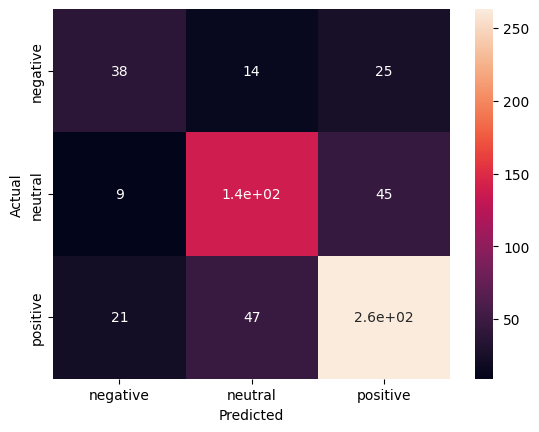

In [ ]:
#Classification Report
from sklearn.metrics import classification_report


print(classification_report(test_Y, predictions_SVM_8020))

#Confusion Matrix
#cmSVM = confusion_matrix(predictions_SVM_8020, predictions_SVM_8020)

#cmSVM = confusion_matrix(test_Y, test_prediction_8020['Labels'])

df_cm = pd.DataFrame()
df_cm['Actual Label'] = test_Y
df_cm['Predicted Label'] = predictions_SVM_8020

confusion_matrix = pd.crosstab(df_cm['Actual Label'], df_cm['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])


sns.heatmap(confusion_matrix, annot=True)

#Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
#Recall – What percent of the positive cases did you catch? Recall = TP/(TP+FN)
#F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, predictions_SVM_8020))
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(test_Y, predictions_SVM_8020)
print(cm)

              precision    recall  f1-score   support

    negative       0.56      0.49      0.52        77
     neutral       0.69      0.72      0.71       192
    positive       0.79      0.79      0.79       331

    accuracy                           0.73       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.73      0.73      0.73       600

[[ 38  14  25]
 [  9 138  45]
 [ 21  47 263]]
